# Melbourne Housing Market

## Import Libraries


In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import urllib.request

## Download CSV

**Lütfen read_csv'ye geçmeden önce dosyaları kontrol ediniz. 403 veya parse error hatası alıyorsanız [less](https://www.mediafire.com/file/pe9t2xgw54ig0kf/MELBOURNE_HOUSE_PRICES_LESS.csv/file) ve [full](https://www.mediafire.com/file/1eq7b0ik70h6740/Melbourne_housing_FULL.csv/file) elle indirmeniz gerekecektir.**

In [3]:
def download_url(url_str, path):
    """
    Bir URL'den dosya indirir.
    Args:
        url_str (str): İndirilecek dosyanın URL'si.
        path (str): İndirilen dosyanın kaydedileceği yol.
    """
    try:
        response = urllib.request.urlopen(url_str)
        if response.status != 200:
            raise Exception(f"HTTP Status: {response.status}")
        data = response.read().decode("utf-8")
        with open(path, "w") as f:
            f.write(data)
        print("Downloaded!")
    except Exception as e:
        print(f"Fatal Error: {e}")

download_url("https://drive.google.com/u/0/uc?id=1lpd5FFa_fiV08DJHFpX-fmXjhSwpd0Gw&export=download", "MELBOURNE_HOUSE_PRICES_LESS.csv")
download_url("https://drive.google.com/u/0/uc?id=1tNCX-4bPpNR1PbN30Kr4YfQKltwhQTW9&export=download", "Melbourne_hosuing_FULL.csv")

Downloaded!
Downloaded!


## **4. Gathering and Observing Data**

● Load the dataset to the project with the help of read_csv() and observe the first 5 columns

● Find the shape, number of columns and size of the dataset

● Show the information of the dataset, which contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells ineach column (non-null values).


*   Load the dataset to the project with the help of read_csv() and observe the first 5 columns

In [4]:
df = pd.read_csv("Melbourne_hosuing_FULL.csv")
df_copy = df.copy()
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


* Find the shape, number of columns and size of the dataset


In [5]:
print(df_copy.shape)
print(df_copy.shape[1]) # number of columns or len(data.columns)
print(df_copy.size) # size of the dataset

(34857, 21)
21
731997


Burada görüleceği gibi 34857 satır 21 sütun bulunmaktadır.

*   Show the information of the dataset, which contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells ineach column (non-null values).




In [6]:
df_copy['Address'].nunique() # görmedi gibi nasıl

df_copy.drop('Address' , axis = 1 , inplace = True)

df_copy['Date'] = pd.to_datetime(df['Date'] , format = '%d/%m/%Y')
df_copy['Year'] = df_copy['Date'].dt.year
df_copy['Month'] = df_copy['Date'].dt.month

df_copy.drop('Date' ,axis = 1, inplace = True)

df_copy.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,3067.0,2.0,1.0,...,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016,9
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,...,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016,12
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,...,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016,2
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3067.0,3.0,2.0,...,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2016,2
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,...,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017,3


In [7]:
print(f"Data info = {df_copy.info()}") # Show the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Rooms          34857 non-null  int64  
 2   Type           34857 non-null  object 
 3   Price          27247 non-null  float64
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Distance       34856 non-null  float64
 7   Postcode       34856 non-null  float64
 8   Bedroom2       26640 non-null  float64
 9   Bathroom       26631 non-null  float64
 10  Car            26129 non-null  float64
 11  Landsize       23047 non-null  float64
 12  BuildingArea   13742 non-null  float64
 13  YearBuilt      15551 non-null  float64
 14  CouncilArea    34854 non-null  object 
 15  Lattitude      26881 non-null  float64
 16  Longtitude     26881 non-null  float64
 17  Regionname     34854 non-null  object 
 18  Proper

In [8]:
print(f"Number of columns = {df_copy.shape[1]}") # which contains the number of columns or data.columns

Number of columns = 21


In [9]:
print(f"{df_copy.columns}") # Column labels

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount', 'Year', 'Month'],
      dtype='object')


In [10]:
print(f"{df_copy.dtypes}") # column data types

Suburb            object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
Year               int32
Month              int32
dtype: object


In [11]:
print(f"{df_copy.memory_usage}") # memory usage or df_copy.describe

<bound method DataFrame.memory_usage of            Suburb  Rooms Type      Price Method        SellerG  Distance  \
0      Abbotsford      2    h        NaN     SS         Jellis       2.5   
1      Abbotsford      2    h  1480000.0      S         Biggin       2.5   
2      Abbotsford      2    h  1035000.0      S         Biggin       2.5   
3      Abbotsford      3    u        NaN     VB         Rounds       2.5   
4      Abbotsford      3    h  1465000.0     SP         Biggin       2.5   
...           ...    ...  ...        ...    ...            ...       ...   
34852  Yarraville      4    h  1480000.0     PI            Jas       6.3   
34853  Yarraville      2    h   888000.0     SP        Sweeney       6.3   
34854  Yarraville      2    t   705000.0      S            Jas       6.3   
34855  Yarraville      3    h  1140000.0     SP  hockingstuart       6.3   
34856  Yarraville      2    h  1020000.0     PI             RW       6.3   

       Postcode  Bedroom2  Bathroom  ...  Lands

In [12]:
print(f"{df_copy.index}") # range index

RangeIndex(start=0, stop=34857, step=1)


In [13]:
for col in df_copy.columns:
    print(f"{col}\tsütunundaki hücre sayısı (null olmayan değerler):", df_copy[col].count()) # the number of cells ineach column (non-null values).

Suburb	sütunundaki hücre sayısı (null olmayan değerler): 34857
Rooms	sütunundaki hücre sayısı (null olmayan değerler): 34857
Type	sütunundaki hücre sayısı (null olmayan değerler): 34857
Price	sütunundaki hücre sayısı (null olmayan değerler): 27247
Method	sütunundaki hücre sayısı (null olmayan değerler): 34857
SellerG	sütunundaki hücre sayısı (null olmayan değerler): 34857
Distance	sütunundaki hücre sayısı (null olmayan değerler): 34856
Postcode	sütunundaki hücre sayısı (null olmayan değerler): 34856
Bedroom2	sütunundaki hücre sayısı (null olmayan değerler): 26640
Bathroom	sütunundaki hücre sayısı (null olmayan değerler): 26631
Car	sütunundaki hücre sayısı (null olmayan değerler): 26129
Landsize	sütunundaki hücre sayısı (null olmayan değerler): 23047
BuildingArea	sütunundaki hücre sayısı (null olmayan değerler): 13742
YearBuilt	sütunundaki hücre sayısı (null olmayan değerler): 15551
CouncilArea	sütunundaki hücre sayısı (null olmayan değerler): 34854
Lattitude	sütunundaki hücre sayısı (n

In [14]:
for col in df_copy.columns:
    null_count = df_copy[col].isnull().sum()
    print(f"**{col} sütundaki null olmayan değerlerin sayısı: {df_copy[col].count()} ({1 - null_count / df_copy.shape[0]}%)**") # the number of cells ineach column (non-null values).

**Suburb sütundaki null olmayan değerlerin sayısı: 34857 (1.0%)**
**Rooms sütundaki null olmayan değerlerin sayısı: 34857 (1.0%)**
**Type sütundaki null olmayan değerlerin sayısı: 34857 (1.0%)**
**Price sütundaki null olmayan değerlerin sayısı: 27247 (0.7816794331124308%)**
**Method sütundaki null olmayan değerlerin sayısı: 34857 (1.0%)**
**SellerG sütundaki null olmayan değerlerin sayısı: 34857 (1.0%)**
**Distance sütundaki null olmayan değerlerin sayısı: 34856 (0.9999713113578335%)**
**Postcode sütundaki null olmayan değerlerin sayısı: 34856 (0.9999713113578335%)**
**Bedroom2 sütundaki null olmayan değerlerin sayısı: 26640 (0.764265427317325%)**
**Bathroom sütundaki null olmayan değerlerin sayısı: 26631 (0.764007229537826%)**
**Car sütundaki null olmayan değerlerin sayısı: 26129 (0.7496055311702097%)**
**Landsize sütundaki null olmayan değerlerin sayısı: 23047 (0.6611871360128525%)**
**BuildingArea sütundaki null olmayan değerlerin sayısı: 13742 (0.39423932065295353%)**
**YearBuilt s

In [15]:
for col in df_copy.columns:
    null_count = df_copy[col].isnull().sum()
    print(f"{col}: {null_count}")

Suburb: 0
Rooms: 0
Type: 0
Price: 7610
Method: 0
SellerG: 0
Distance: 1
Postcode: 1
Bedroom2: 8217
Bathroom: 8226
Car: 8728
Landsize: 11810
BuildingArea: 21115
YearBuilt: 19306
CouncilArea: 3
Lattitude: 7976
Longtitude: 7976
Regionname: 3
Propertycount: 3
Year: 0
Month: 0


## **5. Exploratory Data Analysis**

● Examine the descriptive statistics of dataset

● The values of some variables are given as objects. At the same time, we observe that there are also categorical values. This might give us trouble when examining the dataset. Therefore, in such cases, we need to define the variables categorically.

● Check for duplicate data. If there are duplicate data, clear them from the dataset.

● Clear outlier data in the dataset. When you examine the dataset, you will observe that the outlier data is generally in the "Landsize" and "Buildingarea" variables.

● We expect you to use the z-score method when detecting outliers in the dataset!

● Find and remove the missing values on the dataset

● You can observe from the dataset that the missing values are in the bathroom and car variables. We expect the missing values in the dataset to be filled using the mode method. You can use the code below for this.

In [16]:
print(df_copy.describe())

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946

● Check for duplicate data. If there are duplicate data, clear them from the dataset.
● Clear outlier data in the dataset. When you examine the dataset, you will observe that the outlier data is generally in the "Landsize" and "Buildingarea" variables.

In [17]:
def eksikverihesapla(df):
    # eksik veri yüzdesini hesaplama
    total_cells = np.product(df_copy.shape)
    total_missing = df.isnull().sum().sum()
    percent_missing = (total_missing/total_cells) * 100
    print("Eksik verilerin yüzdesi: {:.2f}%".format(percent_missing))

In [18]:
eksikverihesapla(df_copy)

Eksik verilerin yüzdesi: 13.79%


In [19]:
df_copy.drop_duplicates(inplace=True)

In [20]:
# eksik verileri doldurma
categorical_columns = [col for col in df_copy.columns if df_copy[col].dtype.name in ["object", "int64", "float64"]]
for column in categorical_columns:
    df_copy[column] = df_copy[column].fillna(df_copy[column].mode().iloc[0])

In [21]:
df_copy.corr(numeric_only=True)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Year,Month
Rooms,1.000000,0.361495,0.271398,0.085827,0.824132,0.538624,0.317075,0.038789,0.105702,-0.015339,0.021448,0.092952,-0.071670,0.084639,0.011699
Price,0.361495,1.000000,-0.169589,0.026375,0.294753,0.298523,0.127609,0.033272,0.061423,-0.178573,-0.127584,0.127089,-0.051029,-0.017960,0.017421
Distance,0.271398,-0.169589,1.000000,0.481166,0.239956,0.113259,0.204182,0.044883,0.051487,0.220322,-0.085965,0.179613,-0.018352,0.231451,0.011913
Postcode,0.085827,0.026375,0.481166,1.000000,0.080844,0.103983,0.058603,0.030203,0.030358,0.062462,-0.204872,0.328123,0.016746,0.099785,0.009923
Bedroom2,0.824132,0.294753,0.239956,0.080844,1.000000,0.582798,0.374965,0.035711,0.114032,-0.004082,0.009113,0.106625,-0.046508,0.158169,0.012943
Bathroom,0.538624,0.298523,0.113259,0.103983,0.582798,1.000000,0.227957,0.059559,0.118788,0.096136,-0.001728,0.106414,-0.035569,0.052576,0.005052
Car,0.317075,0.127609,0.204182,0.058603,0.374965,0.227957,1.000000,0.021704,0.068599,0.098209,-0.025965,0.042413,-0.005021,0.132073,0.015305
Landsize,0.038789,0.033272,0.044883,0.030203,0.035711,0.059559,0.021704,1.000000,0.086553,0.003511,0.033412,-0.001798,-0.016972,0.008892,-0.011447
BuildingArea,0.105702,0.061423,0.051487,0.030358,0.114032,0.118788,0.068599,0.086553,1.000000,0.008804,0.018192,-0.003601,-0.016136,0.008336,0.004777
YearBuilt,-0.015339,-0.178573,0.220322,0.062462,-0.004082,0.096136,0.098209,0.003511,0.008804,1.000000,0.061251,-0.015452,0.015462,0.072726,-0.007213


In [22]:
eksikverihesapla(df_copy)

Eksik verilerin yüzdesi: 0.00%


### Data Visualization:

● Build a Histogram to visualize price distribution

● Draw a pair plot to see the relationship between all numerical variables and
the price variable.

● Draw a correlation matrix by using a heatmap on seaborn

● Implement Label Encoder and One Hot encoder for categorical variables


● Build a Histogram to visualize price distribution

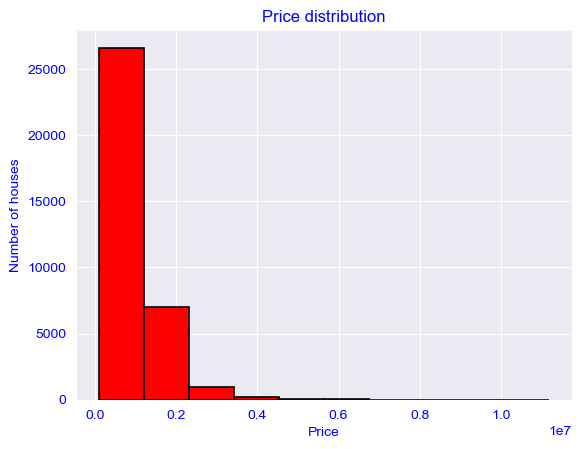

In [23]:
plt.hist(df_copy["Price"], color="red", edgecolor="black", linewidth=1.2)
plt.xlabel("Price", color="blue")
plt.ylabel("Number of houses", color="blue")
plt.title("Price distribution", color="blue")
plt.tick_params(axis="x", colors="blue")
plt.tick_params(axis="y", colors="blue")
plt.show()

● Draw a pair plot to see the relationship between all numerical variables and
the price variable.

C:\Users\UMUT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


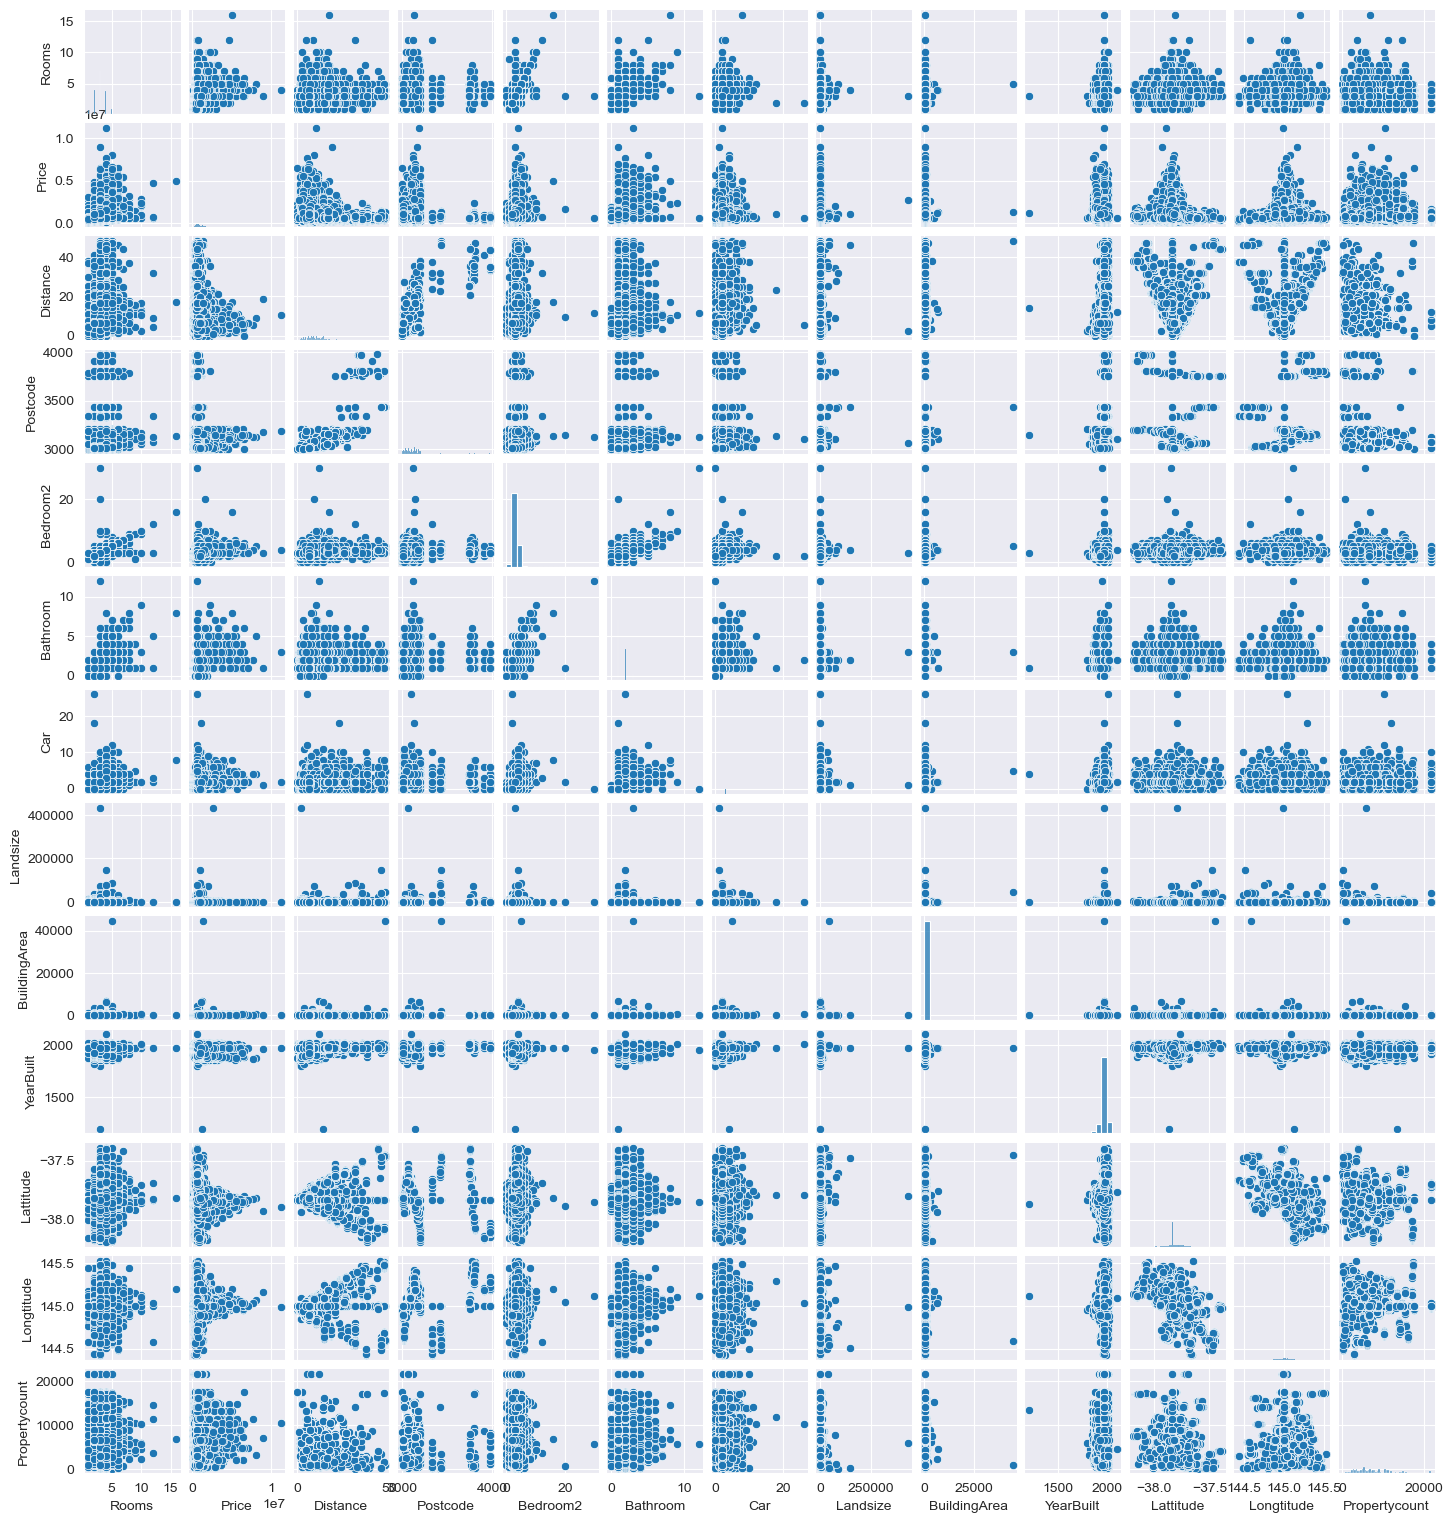

In [24]:
numerical_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns
g = sns.pairplot(data=df_copy, vars=numerical_cols, y_vars=['Price'])
g.fig.set_size_inches(14, 15)
g.fig.subplots_adjust(top=1, right=1)
plt.show()

● Draw a correlation matrix by using a heatmap on seaborn

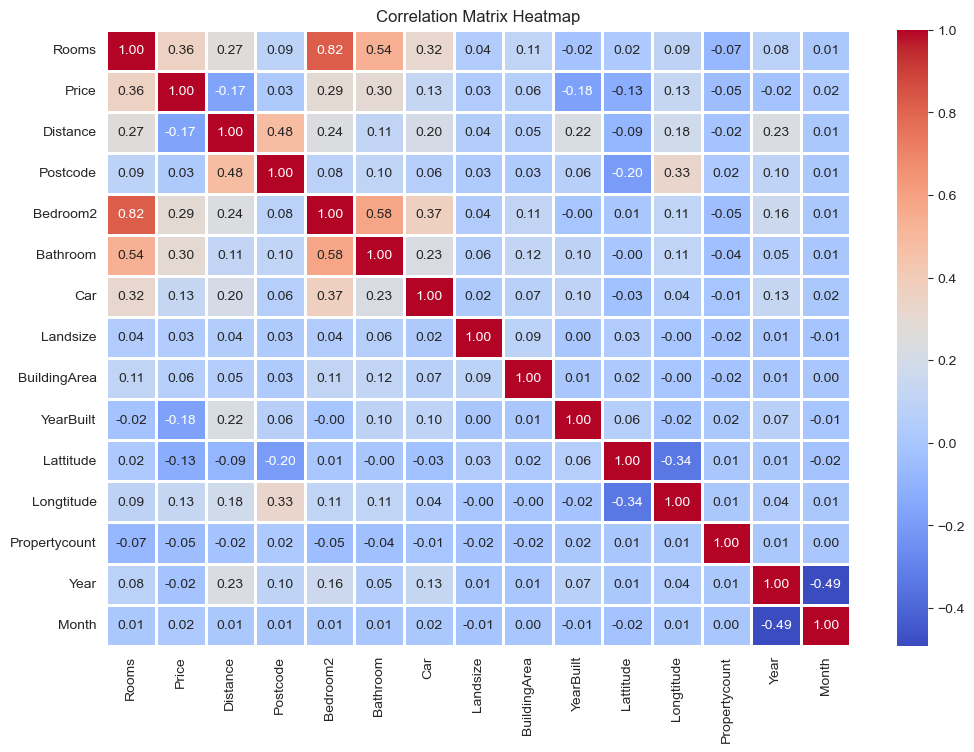

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_copy.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

● Implement Label Encoder and One Hot encoder for categorical variables

In [26]:
print(f"Old Shape = {df_copy.shape}")
print(df_copy.head())

Old Shape = (34794, 21)
       Suburb  Rooms Type      Price Method SellerG  Distance  Postcode  \
0  Abbotsford      2    h   600000.0     SS  Jellis       2.5    3067.0   
1  Abbotsford      2    h  1480000.0      S  Biggin       2.5    3067.0   
2  Abbotsford      2    h  1035000.0      S  Biggin       2.5    3067.0   
3  Abbotsford      3    u   600000.0     VB  Rounds       2.5    3067.0   
4  Abbotsford      3    h  1465000.0     SP  Biggin       2.5    3067.0   

   Bedroom2  Bathroom  ...  Landsize  BuildingArea  YearBuilt  \
0       2.0       1.0  ...     126.0         120.0     1970.0   
1       2.0       1.0  ...     202.0         120.0     1970.0   
2       2.0       1.0  ...     156.0          79.0     1900.0   
3       3.0       2.0  ...       0.0         120.0     1970.0   
4       3.0       2.0  ...     134.0         150.0     1900.0   

          CouncilArea Lattitude  Longtitude             Regionname  \
0  Yarra City Council  -37.8014    144.9958  Northern Metropolit

In [27]:
cat_features = ['Suburb' , 'Rooms' , 'Type' , 'Method' , 'SellerG' , 'Postcode' , 'YearBuilt' , 'CouncilArea' , 'Regionname' , 'Year' , 'Month']

le = LabelEncoder()
for col in cat_features:
    df_copy[col] = (le.fit_transform(df_copy[col])).astype('int')

for col in cat_features:
 df_copy[col] = df_copy[col].astype('category')

df_copy.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month
0,0,1,0,600000.0,6,155,2.5,53,2.0,1.0,...,126.0,120.0,109,31,-37.8014,144.9958,2,4019.0,0,8
1,0,1,0,1480000.0,2,33,2.5,53,2.0,1.0,...,202.0,120.0,109,31,-37.7996,144.9984,2,4019.0,0,11
2,0,1,0,1035000.0,2,33,2.5,53,2.0,1.0,...,156.0,79.0,40,31,-37.8079,144.9934,2,4019.0,0,1
3,0,2,2,600000.0,7,296,2.5,53,3.0,2.0,...,0.0,120.0,109,31,-37.8114,145.0116,2,4019.0,0,1
4,0,2,0,1465000.0,5,33,2.5,53,3.0,2.0,...,134.0,150.0,40,31,-37.8093,144.9944,2,4019.0,1,2


In [28]:
print(f"New Shape = {df_copy.shape}")

New Shape = (34794, 21)


In [29]:
eksikverihesapla(df_copy)

Eksik verilerin yüzdesi: 0.00%


## **6. Model Selection**

● Since we are going to make a price estimation, we need to determine our x and y
variables correctly.

● Splitting our data into train-test in order to increase the performance of model training

● Train your models using preprocessed data with the models mentione

In [30]:
df_copy.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month
0,0,1,0,600000.0,6,155,2.5,53,2.0,1.0,...,126.0,120.0,109,31,-37.8014,144.9958,2,4019.0,0,8
1,0,1,0,1480000.0,2,33,2.5,53,2.0,1.0,...,202.0,120.0,109,31,-37.7996,144.9984,2,4019.0,0,11
2,0,1,0,1035000.0,2,33,2.5,53,2.0,1.0,...,156.0,79.0,40,31,-37.8079,144.9934,2,4019.0,0,1
3,0,2,2,600000.0,7,296,2.5,53,3.0,2.0,...,0.0,120.0,109,31,-37.8114,145.0116,2,4019.0,0,1
4,0,2,0,1465000.0,5,33,2.5,53,3.0,2.0,...,134.0,150.0,40,31,-37.8093,144.9944,2,4019.0,1,2


In [31]:
!pip install catboost lightgbm

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

X = df_copy.drop('Price', axis=1)
y = df_copy['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the models
models = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2),
    'LGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(cat_features = cat_features),
}

mse_scores = {}
train_accuracies = {}
test_accuracies = {}
train_mses = {}
test_mses = {}
mae_scores = {}
rmse_scores = {}
r2_scores = {}
# Tek bir for döngüsü içinde hem model eğitimi hem de değerlendirme
for model_name, model in models.items():
    # Modeli eğitme
    model.fit(X_train, y_train)
    # Test veri seti üzerinde tahmin yapma
    y_pred = model.predict(X_test)

    # Test MSE, MAE, RMSE, R2 hesaplama
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[model_name] = mse
    mae_scores[model_name] = mean_absolute_error(y_test, y_pred)
    rmse_scores[model_name] = np.sqrt(mse_scores[model_name])
    r2_scores[model_name] = r2_score(y_test, y_pred)

    # Eğitim ve test tahminleri
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Accuracy değerlerini hesaplayabiliriz, ancak bu regresyon için genellikle kullanılmaz
    # Eğer yine de kullanmak istiyorsanız, y_train ve y_test'in tam sayı değerleri olması gerekir

    # Eğitim ve Test MSE
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    train_mses[model_name] = train_mse
    test_mses[model_name] = test_mse

    print(f'Model: {model_name}')
    print(f'Eğitim MSE: {train_mse:.4f}')
    print(f'Test MSE: {test_mse:.4f}')

Model: Lasso
Eğitim MSE: 238107260750.0085
Test MSE: 245316540031.7882
Model: LinearRegression
Eğitim MSE: 238107260427.1704
Test MSE: 245316830472.2498
Model: Ridge
Eğitim MSE: 238107340011.1327
Test MSE: 245310197104.8488
Model: ElasticNet
Eğitim MSE: 246269827396.3344
Test MSE: 253920159780.7566
Model: KNeighborsRegressor
Eğitim MSE: 188776163785.1425
Test MSE: 292621848222.1917
Model: RandomForestRegressor
Eğitim MSE: 28245500204.4873
Test MSE: 209921435325.9313
Model: GradientBoostingRegressor
Eğitim MSE: 185765937364.4346
Test MSE: 210575673739.0880
Model: AdaBoostRegressor
Eğitim MSE: 263407437638.9853
Test MSE: 278235568148.4984
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_r

In [33]:
!pip uninstall colorama -y
!pip install colorama

Found existing installation: colorama 0.4.6
Uninstalling colorama-0.4.6:
  Successfully uninstalled colorama-0.4.6
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)


In [34]:
import colorama

# En iyi modeli seçme
best_model_name = min(mse_scores, key=lambda model_name: mse_scores[model_name])
best_model = models[best_model_name]

print(f'The best model is: {colorama.Fore.BLUE}{best_model_name}{colorama.Style.RESET_ALL}')
print(f'MSE on the test set: {colorama.Fore.BLUE}{mse_scores[best_model_name]}{colorama.Style.RESET_ALL}')
print(f'MAE on the test set: {colorama.Fore.BLUE}{mae_scores[best_model_name]}{colorama.Style.RESET_ALL}')
print(f'RMSE on the test set: {colorama.Fore.BLUE}{rmse_scores[best_model_name]}{colorama.Style.RESET_ALL}')
print(f'R2 on the test set: {colorama.Fore.BLUE}{r2_scores[best_model_name]}{colorama.Style.RESET_ALL}')

The best model is: CatBoost
MSE on the test set: 186983226499.8192
MAE on the test set: 242322.57693531833
RMSE on the test set: 432415.57152792177
R2 on the test set: 0.48507452073053325
